# National Health and Nutrition Examination Survey (2013-2014)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

- Import data

In [64]:
medication = pd.read_csv("medications.csv",encoding="latin-1")
demographics = pd.read_csv("demographic.csv",encoding="latin-1")
exam = pd.read_csv("examination.csv",encoding="latin-1")
diet = pd.read_csv("diet.csv",encoding="latin-1")
survey = pd.read_csv("questionnaire.csv",encoding="latin-1")



In [67]:

percent_missing =exam.isnull().sum() * 100 / len(exam)
print(percent_missing['BMXHT'])
exam.loc[:, exam.isnull().sum() < 0.03*exam.shape[0]]
exam.head(10)

7.60216039947009


,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
5,73562,1,1064.0,NaN,NaN,1.0,5.0,60.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,21.0,1.0,NaN,NaN,1.0
6,73563,1,90.0,NaN,152.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,1,954.0,NaN,NaN,1.0,5.0,82.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,12.0,1.0,1.0
8,73566,1,625.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,20.0,1.0,1.0
9,73567,1,932.0,NaN,NaN,1.0,3.0,70.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,54.0,1.0,1.0


In [70]:
percent_missing =survey.isnull().sum() * 100 / len(exam)
print(percent_missing['SMDANY'])

survey['SMDANY']

47.91602975644553


0        1.0
1        1.0
2        2.0
3        NaN
4        2.0
5        2.0
6        NaN
7        2.0
8        NaN
9        1.0
10       1.0
11       2.0
12       NaN
13       NaN
14       2.0
15       NaN
16       NaN
17       2.0
18       NaN
19       NaN
20       2.0
21       2.0
22       NaN
23       2.0
24       2.0
25       NaN
26       NaN
27       NaN
28       1.0
29       NaN
        ... 
10145    2.0
10146    1.0
10147    NaN
10148    NaN
10149    NaN
10150    1.0
10151    2.0
10152    2.0
10153    NaN
10154    2.0
10155    2.0
10156    NaN
10157    NaN
10158    1.0
10159    NaN
10160    2.0
10161    1.0
10162    NaN
10163    1.0
10164    2.0
10165    NaN
10166    2.0
10167    2.0
10168    NaN
10169    NaN
10170    2.0
10171    NaN
10172    NaN
10173    NaN
10174    NaN
Name: SMDANY, Length: 10175, dtype: float64

- Demographic

Select attribute 

In [40]:
demographic= demographics[['SEQN', 'RIAGENDR','RIDAGEYR', 'DMDEDUC2','DMDMARTL', 'INDHHIN2', 'INDFMPIR']] 
demographic.rename(columns={'SEQN': 'Number', 'RIAGENDR': 'Gender', 'RIDAGEYR':'Age','DMDEDUC2':'Grade','DMDMARTL':'Marital_st','INDHHIN2':'Income','INDFMPIR':'Ratio_income' }, inplace=True)



/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [41]:
demographic.head()

,Number,Gender,Age,Grade,Marital_st,Income,Ratio_income
0,73557,1,69,3.0,4.0,4.0,0.84
1,73558,1,54,3.0,1.0,7.0,1.78
2,73559,1,72,4.0,1.0,10.0,4.51
3,73560,1,9,NaN,NaN,9.0,2.52
4,73561,2,73,5.0,1.0,15.0,5.00


- 'SEQN': Respondent sequence number
- 'RIAGENDR':Gender of the participant
- 'RIDAGEYR':Age in years of the participant at 
    the time of screening. Individuals 80 and over are topcoded at 80 years of age.
- 'DMDEDUC2': What is the highest grade 
or level of school {you have/SP has} completed or the highest degree {you have/s/he has} received?
- 'DMDMARTL':Marital status
- 'INDHHIN2':Total household income (reported as a range value in dollars)
- 'INDFMPIR':A ratio of family income to poverty guidelines.

For the whole population:



NameError: name 'df_MEDS' is not defined

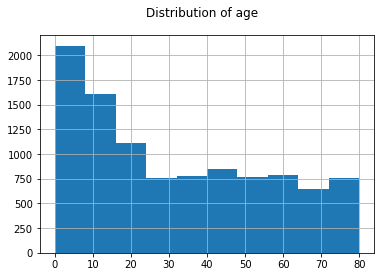

In [42]:
demographics.RIDAGEYR.hist()
plt.suptitle('Distribution of age')

print('For the whole population:\n')
n_meds_taken_whole = df_MEDS['RXDCOUNT'].dropna().astype(int)
pop_meds_whole = df_MEDS.groupby('RXDDRUG').size().sort_values(ascending=False).index[:10].tolist()
print('    People were most commonly taking',int(n_meds_taken_whole.mode()),
      'medications; on average they were taking',str(int(n_meds_taken_whole.mean()))+'.')
print(('    The most common medications were {0}, {1}, and {2}'
       '.').format(pop_meds_whole[0],pop_meds_whole[1],pop_meds_whole[2]))

- Medication

In [43]:
percent_missing = medication.isnull().sum() * 100 / len(medication)
percent_missing

SEQN         0.000000
RXDUSE       0.000000
RXDDRUG     30.177280
RXDDRGID    30.593246
RXQSEEN     30.578390
RXDDAYS     30.583342
RXDRSC1     30.563534
RXDRSC2     96.464296
RXDRSC3     99.371100
RXDRSD1     32.489848
RXDRSD2     96.464296
RXDRSD3     99.371100
RXDCOUNT    30.177280
dtype: float64

In [52]:
medication=medication[['SEQN','RXDDRUG','RXDRSD1']].query("RXDDRUG not in ['99999', '55555', '77777']").dropna()
medication=medication.rename(columns={'SEQN': 'Number', 'RXDDRUG': 'Drug', 'RXDRSD1':'Treatment'})

In [45]:
medication['RXDRSD1'].value_counts()
#medication['RXDRSD1'] 
medication = medication[medication.groupby('RXDRSD1').RXDRSD1.transform(len)>100]


In [46]:
pop_disease = medication.groupby('RXDRSD1').size().sort_values(ascending=False)

print('The most common medications are:')
for i, n in enumerate(pop_disease.index[:10].tolist()):
    print('    '+str(i+1)+'.',n)


The most common medications are:
    1. Essential (primary) hypertension
    2. Pure hypercholesterolemia
    3. Type 2 diabetes mellitus
    4. Asthma
    5. Major depressive disorder, single episode, unspecified
    6. Gastro-esophageal reflux disease
    7. Anxiety disorder, unspecified
    8. Hypothyroidism, unspecified
    9. Dorsalgia, unspecified
    10. Insomnia


Dataset Merge

In [55]:
demog_medic=pd.merge(demographic, medication, on='Number')
demog_medic.head(10)

,Number,Gender,Age,Grade,Marital_st,Income,Ratio_income,Drug,Treatment
0,73557,1,69,3.0,4.0,4.0,0.84,INSULIN,Type 2 diabetes mellitus
1,73558,1,54,3.0,1.0,7.0,1.78,INSULIN GLARGINE,Type 2 diabetes mellitus
2,73558,1,54,3.0,1.0,7.0,1.78,SIMVASTATIN,Pure hypercholesterolemia
3,73559,1,72,4.0,1.0,10.0,4.51,INSULIN ASPART,Type 2 diabetes mellitus
4,73559,1,72,4.0,1.0,10.0,4.51,INSULIN GLARGINE,Type 2 diabetes mellitus
5,73559,1,72,4.0,1.0,10.0,4.51,SIMVASTATIN,Pure hypercholesterolemia
6,73559,1,72,4.0,1.0,10.0,4.51,VALSARTAN,Essential (primary) hypertension
7,73561,2,73,5.0,1.0,15.0,5.00,CARVEDILOL,Essential (primary) hypertension
8,73561,2,73,5.0,1.0,15.0,5.00,LEVOTHYROXINE,"Hypothyroidism, unspecified"
9,73561,2,73,5.0,1.0,15.0,5.00,VALSARTAN,Essential (primary) hypertension


- Examination 

In [74]:
percent_missing = exam.isnull().sum() * 100 / len(exam)
percent_missing

SEQN         0.000000
PEASCST1     0.000000
PEASCTM1     3.108122
BPAARM      23.214104
BPACSZ      23.142770
BPXPLS      23.071436
BPXPULS      3.077550
BPXPTY      22.918577
BPXML1      23.030674
BPXSY1      26.913278
BPXDI1      26.913278
BPAEN1      23.173341
BPXSY2      24.498115
BPXDI2      24.498115
BPAEN2      23.193723
BPXSY3      24.508305
BPXDI3      24.508305
BPAEN3      23.193723
BMDSTATS     0.000000
BMXWT        0.917151
BMXHT        7.602160
BMXBMI       7.724447
BMXLEG      24.569449
BMXARML      5.217569
BMXARMC      5.217569
BMXWAIST    11.739529
BMXSAD1     26.444512
BMXSAD2     26.444512
BMDAVSAD    26.444512
MGDEXSTS    15.510038
              ...    
OHX31TC      8.611026
OHX32TC      8.611026
OHX02CTC     8.641598
OHX03CTC     8.641598
OHX04CTC     8.641598
OHX05CTC     8.641598
OHX06CTC     8.641598
OHX07CTC     8.641598
OHX08CTC     8.641598
OHX09CTC     8.641598
OHX10CTC     8.641598
OHX11CTC     8.641598
OHX12CTC     8.641598
OHX13CTC     8.641598
OHX14CTC  

In [75]:
 exam = exam.loc[:, exam.isnull().sum() < 0.5*exam.shape[0]]

In [76]:
len(exam.columns)

113

In [97]:
survey.columns

Index(['SEQN', 'ACD011A', 'ACD011B', 'ACD011C', 'ACD040', 'ACD110', 'ALQ101',
       'ALQ110', 'ALQ120Q', 'ALQ120U',
       ...
       'WHD080U', 'WHD080L', 'WHD110', 'WHD120', 'WHD130', 'WHD140', 'WHQ150',
       'WHQ030M', 'WHQ500', 'WHQ520'],
      dtype='object', length=953)